<center><img src="https://universodiscreto.com/circle-ud.png"/></center>

# 1. Teoria

Mencionar que imagens são matrizes de cor e mostrar um exemplo de operador de convolução com filtro da média

## 1.1 Imports

In [4]:
import numpy as np
import cv2

## 1.2 Funções para exibir imagem em grid

In [5]:
from matplotlib import pyplot as plt

def showSingleImage(img, title, size):
    fig, axis = plt.subplots(figsize = size)

    axis.imshow(img, 'gray')
    axis.set_title(title, fontdict = {'fontsize': 22, 'fontweight': 'medium'})
    plt.show()
    
def showMultipleImages(imgsArray, titlesArray, size, x, y):
    if(x < 1 or y < 1):
        print("ERRO: X e Y não podem ser zero ou abaixo de zero!")
        return
    elif(x == 1 and y == 1):
        showSingleImage(imgsArray, titlesArray)
    elif(x == 1):
        fig, axis = plt.subplots(y, figsize = size)
        yId = 0
        for img in imgsArray:
            axis[yId].imshow(img, 'gray')
            axis[yId].set_anchor('NW')
            axis[yId].set_title(titlesArray[yId], fontdict = {'fontsize': 18, 'fontweight': 'medium'}, pad = 10)

            yId += 1
    elif(y == 1):
        fig, axis = plt.subplots(1, x, figsize = size)
        fig.suptitle(titlesArray)
        xId = 0
        for img in imgsArray:
            axis[xId].imshow(img, 'gray')
            axis[xId].set_anchor('NW')
            axis[xId].set_title(titlesArray[xId], fontdict = {'fontsize': 18, 'fontweight': 'medium'}, pad = 10)

            xId += 1
    else:
        fig, axis = plt.subplots(y, x, figsize = size)
        xId, yId, titleId = 0, 0, 0
        for img in imgsArray:
            axis[yId, xId].set_title(titlesArray[titleId], fontdict = {'fontsize': 18, 'fontweight': 'medium'}, pad = 10)
            axis[yId, xId].set_anchor('NW')
            axis[yId, xId].imshow(img, 'gray')
            if(len(titlesArray[titleId]) == 0):
                axis[yId, xId].axis('off')

            titleId += 1
            xId += 1
            if xId == x:
                xId = 0
                yId += 1
    plt.show()

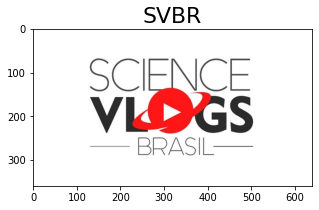

In [7]:
svbr_img = cv2.imread("svbr.jpeg")
svbr_img = cv2.cvtColor(svbr_img, cv2.COLOR_BGR2RGB)
showSingleImage(svbr_img, "SVBR", (5, 7))

## 1.4 Filtragem Passa-Baixa

### 1.4.1 Filtro da Média (Blur)

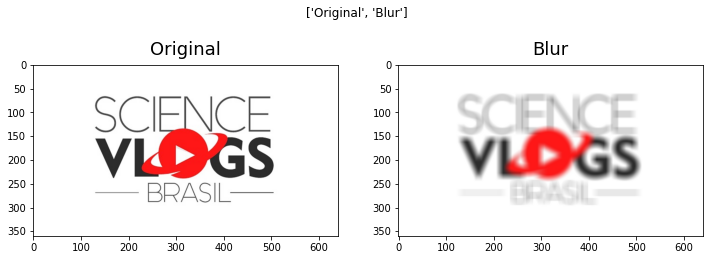

In [22]:
blur_img = cv2.blur(svbr_img, (15, 15))

imgsArray = [svbr_img, blur_img]
titlesArray = ['Original', 'Blur']
showMultipleImages(imgsArray, titlesArray, (12, 8), 2, 1)

### 1.4.2 Filtro Gaussiano

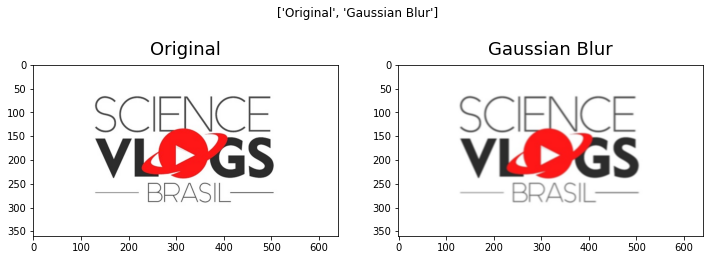

In [28]:
blur_img = cv2.GaussianBlur(svbr_img, (5, 5), 0)

imgsArray = [svbr_img, blur_img]
titlesArray = ['Original', 'Gaussian Blur']
showMultipleImages(imgsArray, titlesArray, (12, 8), 2, 1)

### 1.4.3 Filtro da Mediana

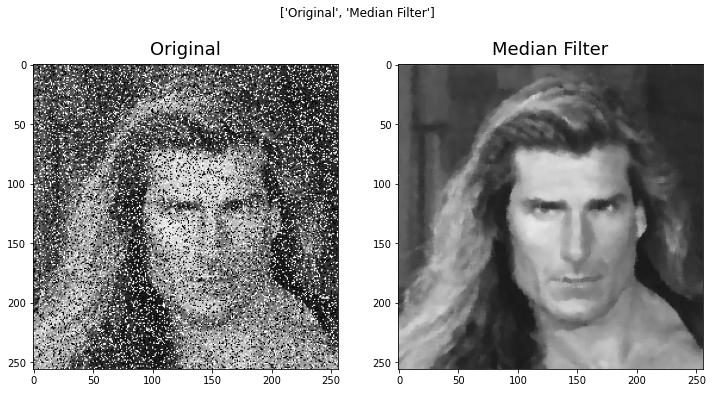

In [36]:
noise_img = cv2.imread("noise.png")
median_img = cv2.medianBlur(noise_img, 5)

imgsArray = [noise_img, median_img]
titlesArray = ['Original', 'Median Filter']
showMultipleImages(imgsArray, titlesArray, (12, 8), 2, 1)

### 1.4.4 Filtro Bilateral

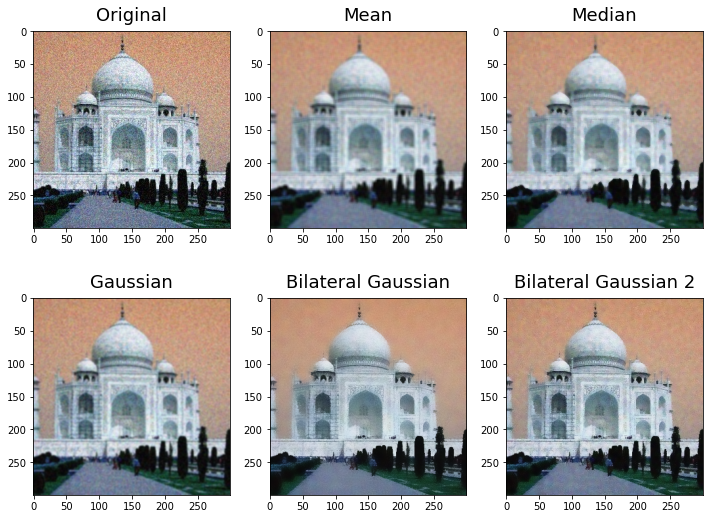

In [52]:
img = cv2.imread("taj.jpg")
mean_img = cv2.blur(img, (5, 5))
median_img = cv2.medianBlur(img, 5)
gaussian_img = cv2.GaussianBlur(img, (5, 5), 0)
bil_gaussian_img = cv2.bilateralFilter(img, 15, 100, 100)
bil_gaussian_img2 = cv2.bilateralFilter(img, 9, 75, 1000)

imgsArray = [img, mean_img, median_img, gaussian_img, bil_gaussian_img, bil_gaussian_img2]
titlesArray = ['Original', 'Mean', 'Median', 'Gaussian', 'Bilateral Gaussian', 'Bilateral Gaussian 2']
showMultipleImages(imgsArray, titlesArray, (12, 9), 3, 2)

# Referências

* https://www.pyimagesearch.com/2021/04/28/opencv-smoothing-and-blurring/
* https://docs.opencv.org/master/d4/d13/tutorial_py_filtering.html
* https://en.wikipedia.org/wiki/Gaussian_blur
* https://stackoverflow.com/questions/23007064/effect-of-variance-sigma-at-gaussian-smoothing
* https://homepages.inf.ed.ac.uk/rbf/HIPR2/gsmooth.htm
* https://www.geeksforgeeks.org/python-bilateral-filtering/
* https://datacarpentry.org/image-processing/06-blurring/